In [1]:
import csv
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

In [2]:
database = input() # оставляем из таблицы с данными Русского Конструктикона только то, что нужно для дальнейшего анализа
with open(database, newline='') as source:
    reader = csv.DictReader(source)
    with open('export.csv', mode='w', encoding='utf-8-sig', newline='') as destination:

        writer = csv.DictWriter(destination, dialect=csv.unix_dialect, fieldnames=reader.fieldnames)
        writer.writeheader()
        writer.writerows(
            filter(lambda x: 'V' in x.get('Name') or 'X' in x.get('Name'), reader)
        )

database1.csv


In [3]:
with open('export.csv', newline='') as csvfile: # открываем полученную ранее таблицу
    reader = csv.DictReader(csvfile)

In [4]:
def clean(diction, name, number): # первый способ очищения предложений: убираем разметку
    sent = ""
    for i in str(diction[name][number]):
        if i not in "qwertyuioplkjhgfdsazxcvbnmQWERTYUIOPLKJHGFDSAZXCVBNM[]":
            sent = sent + i
    return(sent)

In [4]:
import re

In [5]:
def clean(diction, name, number): # второй способ очищения предложений: убираем разметку и оставляем только предложение с интересующей конструкцией
    sent = ""
    text = re.split("\.|\!|\?", str(diction[name][number]))
    for j in text:
        if('[' in j):
            for i in j:
                if i not in "qwertyuioplkjhgfdsazxcvbnmQWERTYUIOPLKJHGFDSAZXCVBNM[]":
                    sent = sent + i
    return(sent)

In [6]:
dff = pd.read_csv('export.csv', delimiter=',') # создаём словари, где каждому предложению будет сопоставлен его тип
#, encoding='latin-1')
slov = {} # словарь семантических типов
slov_synt = {} # словарь синтаксических типов
for i in range(len(dff)):
    if(type(dff["SemType1"][i]) != float): # записываем предложения из примеров и иллюстрации
        slov[clean(dff, "Example 1", i)] = dff["SemType1"][i] # чтобы получить характеристики по второму семантическому типу, заменить везде SemType1 на SemType2
        slov[clean(dff, "Example 2", i)] = dff["SemType1"][i]
        slov[clean(dff, "Example 3", i)] = dff["SemType1"][i]
        slov[clean(dff, "Example 4", i)] = dff["SemType1"][i]
        slov[clean(dff, "Example 5", i)] = dff["SemType1"][i]
        slov[clean(dff, "Illustration", i)] = dff["SemType1"][i]
        slov_synt[clean(dff, "Example 1", i)] = dff['Synt. type of construction'][i]
        slov_synt[clean(dff, "Example 2", i)] = dff['Synt. type of construction'][i]
        slov_synt[clean(dff, "Example 3", i)] = dff['Synt. type of construction'][i]
        slov_synt[clean(dff, "Example 4", i)] = dff['Synt. type of construction'][i]
        slov_synt[clean(dff, "Example 5", i)] = dff['Synt. type of construction'][i]
        slov_synt[clean(dff, "Illustration", i)] = dff['Synt. type of construction'][i]

In [9]:
pok = {} # убираем предложения, принадлежащие к малочисленным семантическим классам
banned = []
for i in slov:
    if(slov[i] in pok.keys()):
        pok[slov[i]] += 1
    else:
        pok[slov[i]] = 1
    if(pok[slov[i]] > 500): # убираем предложения, из семантического класса которых уже взято 500 предложений
        banned.append(i)
ban = []
for i in pok:
    if(pok[i] < 50):
        ban.append(i)
for i in slov.keys():
    if(slov[i] in ban):
        banned.append(i)
for i in banned:
    slov.pop(i)
    slov_synt.pop(i)

In [10]:
pok1 = {} # убираем предложения, принадлежащие к малочисленным синтаксическим классам
banned1 = []
for i in slov_synt:
    if(slov_synt[i] in pok1.keys()):
        pok1[slov_synt[i]] += 1
    else:
        pok1[slov_synt[i]] = 1
    if(pok1[slov_synt[i]] > 500): # убираем предложения, из синтаксического класса которых уже взято 500 предложений
        banned1.append(i)
ban1 = []
for i in pok1:
    if(pok1[i] < 50):
        ban1.append(i)
for i in slov_synt.keys():
    if(slov_synt[i] in ban1):
        banned1.append(i)
for i in banned1:
    slov_synt.pop(i)
    slov.pop(i)
# после запуска этой ячейки можно ещё раз запустить предыдущую, чтобы после удаления части предложений с редким синт. типом не оказалось, что есть очень малочисленные сем. типы

In [11]:
df = pd.DataFrame(list(slov. items ()), columns = ['Example', 'SemType']) # создаём датафрейм из словаря с семантическими типами предложений

In [12]:
data_train, data_test, y_train, y_test = train_test_split(df['Example'], df['SemType'], test_size=0.2, random_state=0) # делим предложения на train и test

In [12]:
!git clone https://github.com/AIRI-Institute/Probing_framework/ # клонируем с гитхаба репозиторий, с помощью которого будет проводиться пробинг

Cloning into 'Probing_framework'...
remote: Enumerating objects: 2053, done.
remote: Counting objects: 100% (840/840), done.
remote: Compressing objects: 100% (394/394), done.
remote: Total 2053 (delta 522), reused 625 (delta 444), pack-reused 1213
Receiving objects: 100% (2053/2053), 67.11 MiB | 18.43 MiB/s, done.
Resolving deltas: 100% (1308/1308), done.
Updating files: 100% (71/71), done.


In [13]:
%cd Probing_framework/

/content/Probing_framework


In [14]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [15]:
from probing.pipeline import ProbingPipeline

experiment = ProbingPipeline( # задаём параметры для пробинга
    hf_model_name="DeepPavlov/rubert-base-cased", # задаём модель
    device="cuda:0",
    classifier_name="logreg",
    metric_names=["f1", "accuracy"],
    )

Some weights of the model checkpoint at DeepPavlov/rubert-base-cased were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [16]:
%cd data

/content/Probing_framework/data


In [17]:
with open('SemType1.txt', 'w', newline='') as csvfile: # создаём семантический файл, который отдадим на пробинг
    filewriter = csv.writer(csvfile, delimiter='\t')
    for i in data_train:
        if(slov[i] != "" and i != ""):
            filewriter.writerow(['tr', slov[i], i])
    for i in data_test:
        if(slov[i] != "" and i != ""):
            filewriter.writerow(['te', slov[i], i])
    for i in data_test:
        if(slov[i] != "" and i != ""):
            filewriter.writerow(['va', slov[i], i])

In [26]:
experiment.run(probe_task="SemType1",
               do_control_task = True,
               ) # проводим пробинг

Task in progress: SemType1
Path to data: /content/Probing_framework/data/SemType1.txt


Probing by layers:   8%|▊         | 1/12 [00:00<00:08,  1.25it/s]

[tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9)

Probing by layers:  17%|█▋        | 2/12 [00:02<00:13,  1.34s/it]

[tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9)

Probing by layers:  25%|██▌       | 3/12 [00:03<00:09,  1.02s/it]

[tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9)

Probing by layers:  33%|███▎      | 4/12 [00:03<00:06,  1.21it/s]

[tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9)

Probing by layers:  42%|████▏     | 5/12 [00:04<00:04,  1.40it/s]

[tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9)

Probing by layers:  50%|█████     | 6/12 [00:04<00:03,  1.54it/s]

[tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9)

Probing by layers:  58%|█████▊    | 7/12 [00:05<00:03,  1.64it/s]

[tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9)

Probing by layers:  67%|██████▋   | 8/12 [00:05<00:02,  1.73it/s]

[tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9)

Probing by layers:  75%|███████▌  | 9/12 [00:06<00:01,  1.77it/s]

[tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9)

Probing by layers:  83%|████████▎ | 10/12 [00:06<00:01,  1.81it/s]

[tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(7), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9)

Probing by layers:  92%|█████████▏| 11/12 [00:07<00:00,  1.82it/s]

[tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(7), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(6), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9)

Probing by layers: 100%|██████████| 12/12 [00:07<00:00,  1.52it/s]

[tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9)

In [19]:
with open('SyntType.txt', 'w', newline='') as csvfile: # создаём синтаксический файл, который отдадим на пробинг
    filewriter = csv.writer(csvfile, delimiter='\t')
    for i in data_train:
        if(slov_synt[i] != "" and i != ""):
             filewriter.writerow(['tr', slov_synt[i], i])
    for i in data_test:
        if(slov_synt[i] != "" and i != ""):
             filewriter.writerow(['te', slov_synt[i], i])
    for i in data_test:
        if(slov_synt[i] != "" and i != ""):
             filewriter.writerow(['va', slov_synt[i], i])

In [27]:
experiment.run(probe_task="SyntType",
               do_control_task = True
               ) # проводим пробинг

Task in progress: SyntType
Path to data: /content/Probing_framework/data/SyntType.txt


Probing by layers:   8%|▊         | 1/12 [00:00<00:05,  1.89it/s]

[tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5)

Probing by layers:  17%|█▋        | 2/12 [00:01<00:05,  1.93it/s]

[tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5)

Probing by layers:  25%|██▌       | 3/12 [00:01<00:04,  1.91it/s]

[tensor(1), tensor(1), tensor(5), tensor(1), tensor(5), tensor(5), tensor(1), tensor(5), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(5), tensor(5), tensor(1), tensor(1), tensor(5), tensor(5), tensor(1), tensor(5), tensor(5), tensor(1), tensor(5), tensor(1), tensor(1), tensor(5), tensor(1), tensor(1), tensor(1), tensor(5), tensor(1), tensor(5), tensor(5), tensor(5), tensor(1), tensor(5), tensor(1), tensor(5), tensor(1), tensor(1), tensor(1), tensor(5), tensor(5), tensor(1), tensor(1), tensor(5), tensor(5), tensor(1), tensor(5), tensor(5), tensor(1), tensor(1), tensor(5), tensor(1), tensor(1), tensor(5), tensor(5), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(5), tensor(1), tensor(1), tensor(1), tensor(1), tensor(5), tensor(1), tensor(5), tensor(1), tensor(5), tensor(1), tensor(5), tensor(1), tensor(5), tensor(1), tensor(1), tensor(5), tensor(5), tensor(5), tensor(5), tensor(1), tensor(1), tensor(5), tensor(1), tensor(5), tensor(1), tensor(5)

Probing by layers:  33%|███▎      | 4/12 [00:02<00:04,  1.90it/s]

[tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5)

Probing by layers:  42%|████▏     | 5/12 [00:02<00:03,  1.87it/s]

[tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(1), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(1), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(1), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(1), tensor(5), tensor(5), tensor(5), tensor(1), tensor(5)

Probing by layers:  50%|█████     | 6/12 [00:03<00:03,  1.89it/s]

[tensor(5), tensor(5), tensor(5), tensor(1), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(1), tensor(1), tensor(1), tensor(5), tensor(5), tensor(5), tensor(5), tensor(1), tensor(5), tensor(5), tensor(1), tensor(5), tensor(5), tensor(1), tensor(5), tensor(5), tensor(5), tensor(5), tensor(1), tensor(5), tensor(1), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(1), tensor(5), tensor(5), tensor(5), tensor(1), tensor(1), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(1), tensor(1), tensor(5), tensor(1), tensor(5), tensor(5), tensor(1), tensor(1), tensor(5), tensor(5), tensor(1), tensor(5), tensor(5), tensor(1), tensor(5), tensor(5), tensor(1), tensor(1), tensor(1), tensor(1), tensor(5), tensor(1), tensor(5), tensor(5), tensor(5), tensor(1), tensor(5), tensor(5), tensor(1), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(1), tensor(5), tensor(5), tensor(5), tensor(1), tensor(5)

Probing by layers:  58%|█████▊    | 7/12 [00:03<00:02,  1.91it/s]

[tensor(5), tensor(5), tensor(1), tensor(1), tensor(5), tensor(5), tensor(1), tensor(5), tensor(5), tensor(5), tensor(1), tensor(1), tensor(5), tensor(5), tensor(1), tensor(1), tensor(1), tensor(5), tensor(5), tensor(1), tensor(5), tensor(5), tensor(1), tensor(5), tensor(5), tensor(5), tensor(5), tensor(1), tensor(1), tensor(5), tensor(5), tensor(1), tensor(5), tensor(5), tensor(5), tensor(1), tensor(5), tensor(5), tensor(5), tensor(1), tensor(1), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(1), tensor(1), tensor(1), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(1), tensor(1), tensor(5), tensor(1), tensor(1), tensor(1), tensor(1), tensor(5), tensor(5), tensor(1), tensor(5), tensor(1), tensor(5), tensor(5), tensor(5), tensor(1), tensor(5), tensor(1), tensor(5), tensor(5), tensor(5), tensor(1), tensor(5), tensor(5), tensor(1), tensor(5), tensor(5), tensor(5), tensor(1), tensor(5)

Probing by layers:  67%|██████▋   | 8/12 [00:04<00:02,  1.89it/s]

[tensor(5), tensor(5), tensor(1), tensor(1), tensor(5), tensor(5), tensor(5), tensor(5), tensor(1), tensor(1), tensor(1), tensor(5), tensor(5), tensor(5), tensor(1), tensor(1), tensor(5), tensor(5), tensor(5), tensor(1), tensor(5), tensor(5), tensor(1), tensor(5), tensor(5), tensor(5), tensor(5), tensor(1), tensor(1), tensor(5), tensor(5), tensor(1), tensor(5), tensor(5), tensor(5), tensor(1), tensor(5), tensor(5), tensor(5), tensor(1), tensor(1), tensor(5), tensor(5), tensor(5), tensor(1), tensor(5), tensor(1), tensor(5), tensor(5), tensor(1), tensor(5), tensor(1), tensor(1), tensor(5), tensor(5), tensor(1), tensor(5), tensor(5), tensor(1), tensor(1), tensor(5), tensor(1), tensor(1), tensor(5), tensor(1), tensor(5), tensor(1), tensor(1), tensor(5), tensor(1), tensor(1), tensor(5), tensor(5), tensor(5), tensor(5), tensor(1), tensor(1), tensor(5), tensor(1), tensor(1), tensor(5), tensor(5), tensor(1), tensor(5), tensor(5), tensor(1), tensor(5), tensor(1), tensor(5), tensor(1), tensor(5)

Probing by layers:  75%|███████▌  | 9/12 [00:04<00:01,  1.89it/s]

[tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5)

Probing by layers:  83%|████████▎ | 10/12 [00:05<00:01,  1.90it/s]

[tensor(1), tensor(1), tensor(1), tensor(5), tensor(5), tensor(5), tensor(1), tensor(5), tensor(1), tensor(1), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(1), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(1), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(1), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(1), tensor(1), tensor(5), tensor(1), tensor(5), tensor(5), tensor(5), tensor(1), tensor(5), tensor(5), tensor(5), tensor(5), tensor(1), tensor(5), tensor(5), tensor(1), tensor(1), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(1), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(1), tensor(1), tensor(5), tensor(1), tensor(5), tensor(1), tensor(5)

Probing by layers:  92%|█████████▏| 11/12 [00:05<00:00,  1.88it/s]

[tensor(1), tensor(1), tensor(1), tensor(5), tensor(5), tensor(5), tensor(1), tensor(5), tensor(1), tensor(1), tensor(5), tensor(5), tensor(1), tensor(5), tensor(5), tensor(1), tensor(1), tensor(5), tensor(1), tensor(1), tensor(1), tensor(5), tensor(5), tensor(5), tensor(1), tensor(1), tensor(5), tensor(5), tensor(5), tensor(1), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(1), tensor(5), tensor(5), tensor(5), tensor(1), tensor(5), tensor(5), tensor(1), tensor(1), tensor(1), tensor(5), tensor(1), tensor(5), tensor(5), tensor(1), tensor(1), tensor(5), tensor(1), tensor(5), tensor(5), tensor(1), tensor(1), tensor(1), tensor(5), tensor(5), tensor(1), tensor(1), tensor(1), tensor(1), tensor(5), tensor(1), tensor(1), tensor(1), tensor(5), tensor(5), tensor(5), tensor(5), tensor(1), tensor(1), tensor(1), tensor(5), tensor(5), tensor(5), tensor(5), tensor(1), tensor(5), tensor(1), tensor(1), tensor(5), tensor(1), tensor(1), tensor(5), tensor(1), tensor(5)

Probing by layers: 100%|██████████| 12/12 [00:06<00:00,  1.85it/s]

[tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(1), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(1), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(1), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(1), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(1), tensor(5), tensor(5), tensor(5), tensor(1), tensor(5), tensor(5), tensor(5), tensor(5), tensor(1), tensor(5), tensor(5), tensor(5)

Далее содержится код, с помошью которого были созданы графики для работы.

In [24]:
trsl = {        "Biclausal Construction": 60,
                "Clause": 343,
                "Clause or XP with parentheticals": 131,
                "Connection Construction": 106,
                "Copula Construction": 167,
                "Head and Modifier Construction": 323,
                "Matrix and Infinitival Complement Construction": 55
            }
tesl = {        "Biclausal Construction": 15,
                "Clause": 86,
                "Clause or XP with parentheticals": 32,
                "Connection Construction": 23,
                "Copula Construction": 52,
                "Head and Modifier Construction": 75,
                "Matrix and Infinitival Complement Construction": 14
            }


In [22]:
import numpy as np
import matplotlib.pyplot as plt
import itertools


<BarContainer object of 7 artists>

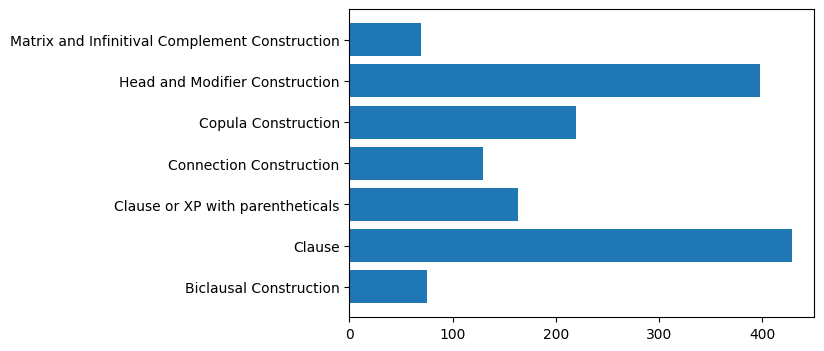

In [25]:
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot()
x = []
y = []
for i in trsl.keys():
    x.append(i)
    y.append(trsl[i] + tesl[i])
ax.barh(x, y)

In [ ]:
#sem1_1
y_preds = "[tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(7), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(5), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(19), tensor(13), tensor(13), tensor(5), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(19), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13)]"
y_trues = "[tensor(21), tensor(22), tensor(15), tensor(11), tensor(13), tensor(9), tensor(22), tensor(14), tensor(11), tensor(24), tensor(28), tensor(3), tensor(24), tensor(5), tensor(24), tensor(26), tensor(27), tensor(13), tensor(29), tensor(19), tensor(19), tensor(3), tensor(7), tensor(1), tensor(13), tensor(9), tensor(22), tensor(26), tensor(2), tensor(20), tensor(24), tensor(24), tensor(28), tensor(7), tensor(20), tensor(27), tensor(24), tensor(5), tensor(19), tensor(24), tensor(4), tensor(29), tensor(27), tensor(29), tensor(7), tensor(7), tensor(11), tensor(21), tensor(18), tensor(8), tensor(12), tensor(7), tensor(2), tensor(3), tensor(24), tensor(21), tensor(13), tensor(7), tensor(7), tensor(22), tensor(21), tensor(6), tensor(13), tensor(29), tensor(7), tensor(29), tensor(11), tensor(25), tensor(29), tensor(8), tensor(29), tensor(6), tensor(24), tensor(2), tensor(15), tensor(13), tensor(28), tensor(2), tensor(6), tensor(27), tensor(13), tensor(10), tensor(6), tensor(28), tensor(22), tensor(6), tensor(13), tensor(28), tensor(10), tensor(7), tensor(0), tensor(5), tensor(2), tensor(22), tensor(11), tensor(10), tensor(10), tensor(5), tensor(17), tensor(7), tensor(3), tensor(10), tensor(13), tensor(0), tensor(4), tensor(17), tensor(13), tensor(16), tensor(3), tensor(6), tensor(19), tensor(22), tensor(5), tensor(3), tensor(29), tensor(7), tensor(1), tensor(13), tensor(11), tensor(1), tensor(1), tensor(24), tensor(13), tensor(12), tensor(16), tensor(28), tensor(11), tensor(1), tensor(24), tensor(7), tensor(18), tensor(29), tensor(2), tensor(15), tensor(13), tensor(18), tensor(7), tensor(2), tensor(24), tensor(2), tensor(28), tensor(0), tensor(0), tensor(5), tensor(20), tensor(22), tensor(19), tensor(28), tensor(11), tensor(7), tensor(13), tensor(27), tensor(15), tensor(28), tensor(22), tensor(6), tensor(17), tensor(28), tensor(28), tensor(2), tensor(16), tensor(7), tensor(20), tensor(10), tensor(29), tensor(7), tensor(28), tensor(11), tensor(15), tensor(24), tensor(7), tensor(7), tensor(3), tensor(5), tensor(7), tensor(12), tensor(28), tensor(25), tensor(9), tensor(11), tensor(6), tensor(10), tensor(28), tensor(5), tensor(8), tensor(1), tensor(13), tensor(13), tensor(29), tensor(21), tensor(9), tensor(17), tensor(5), tensor(6), tensor(27), tensor(25), tensor(23), tensor(10), tensor(3), tensor(13), tensor(5), tensor(8), tensor(13), tensor(14), tensor(5), tensor(20), tensor(17), tensor(19), tensor(28), tensor(7), tensor(19), tensor(0), tensor(14), tensor(14), tensor(11), tensor(22), tensor(20), tensor(6), tensor(3), tensor(13), tensor(13), tensor(6), tensor(10), tensor(12), tensor(22), tensor(15), tensor(5), tensor(6), tensor(10), tensor(6), tensor(12), tensor(6), tensor(10), tensor(14), tensor(29), tensor(25), tensor(29), tensor(28), tensor(6), tensor(10), tensor(13), tensor(19), tensor(11), tensor(29), tensor(4), tensor(23), tensor(13), tensor(7), tensor(11), tensor(13), tensor(1), tensor(20), tensor(9), tensor(3), tensor(28), tensor(16), tensor(19), tensor(10), tensor(29), tensor(25), tensor(13), tensor(1), tensor(29), tensor(10), tensor(7), tensor(24), tensor(4), tensor(7), tensor(13), tensor(24), tensor(25), tensor(9), tensor(20), tensor(14), tensor(29), tensor(13), tensor(3), tensor(20), tensor(26), tensor(8), tensor(13), tensor(13), tensor(5), tensor(23), tensor(29), tensor(13), tensor(17), tensor(28), tensor(29), tensor(7), tensor(16), tensor(13), tensor(7), tensor(13), tensor(1), tensor(13), tensor(15), tensor(5), tensor(25), tensor(29), tensor(0), tensor(22), tensor(6), tensor(29), tensor(6), tensor(15), tensor(27), tensor(3), tensor(29), tensor(19), tensor(14), tensor(21), tensor(11), tensor(21), tensor(17), tensor(19), tensor(24), tensor(24), tensor(22), tensor(14), tensor(9), tensor(26), tensor(13), tensor(6), tensor(5), tensor(7), tensor(6), tensor(13), tensor(14), tensor(14), tensor(2), tensor(3), tensor(11), tensor(20), tensor(5), tensor(13), tensor(17), tensor(13), tensor(13), tensor(8), tensor(2), tensor(10), tensor(18), tensor(13), tensor(6), tensor(16), tensor(19), tensor(24), tensor(20), tensor(29), tensor(13), tensor(20), tensor(28), tensor(24), tensor(22), tensor(21), tensor(13), tensor(20), tensor(19), tensor(7), tensor(11), tensor(7), tensor(24), tensor(5), tensor(13), tensor(11), tensor(13), tensor(12), tensor(13), tensor(16), tensor(2), tensor(13), tensor(13), tensor(16), tensor(28), tensor(23), tensor(3), tensor(28), tensor(29), tensor(2), tensor(7), tensor(14), tensor(13), tensor(29), tensor(2), tensor(7), tensor(13), tensor(28), tensor(11), tensor(13), tensor(23), tensor(0), tensor(7), tensor(5), tensor(7), tensor(5), tensor(29), tensor(23), tensor(13), tensor(12), tensor(20), tensor(24), tensor(13), tensor(7), tensor(13), tensor(17), tensor(11), tensor(13), tensor(25), tensor(3), tensor(13), tensor(19), tensor(5), tensor(3), tensor(28), tensor(11), tensor(28), tensor(28), tensor(13), tensor(13), tensor(28), tensor(13), tensor(12), tensor(17), tensor(4), tensor(19), tensor(15), tensor(25), tensor(26), tensor(29), tensor(7), tensor(5), tensor(28), tensor(16), tensor(13), tensor(0), tensor(7), tensor(13), tensor(7), tensor(28), tensor(5), tensor(9), tensor(9), tensor(11), tensor(15), tensor(28), tensor(2), tensor(3), tensor(24), tensor(20), tensor(28), tensor(5), tensor(28), tensor(24), tensor(17), tensor(12), tensor(10), tensor(7), tensor(23), tensor(26), tensor(13), tensor(25), tensor(16), tensor(13), tensor(13), tensor(28), tensor(28), tensor(16), tensor(26), tensor(7), tensor(11), tensor(19), tensor(2), tensor(9), tensor(28), tensor(1), tensor(6), tensor(14), tensor(16), tensor(13), tensor(28), tensor(6), tensor(17), tensor(17), tensor(3), tensor(10), tensor(11), tensor(7), tensor(5), tensor(29), tensor(8), tensor(19), tensor(8), tensor(20), tensor(6), tensor(23), tensor(22), tensor(21), tensor(6), tensor(21), tensor(2), tensor(13), tensor(15), tensor(11), tensor(15), tensor(5), tensor(28), tensor(13), tensor(7), tensor(18), tensor(28), tensor(11), tensor(24), tensor(13), tensor(28), tensor(20), tensor(28), tensor(5), tensor(21), tensor(13), tensor(13), tensor(16), tensor(9), tensor(28), tensor(17), tensor(3), tensor(6), tensor(13), tensor(23), tensor(28), tensor(5), tensor(5), tensor(28), tensor(5), tensor(6), tensor(7), tensor(12), tensor(2), tensor(2), tensor(10), tensor(20), tensor(18), tensor(11), tensor(29), tensor(19), tensor(21), tensor(1), tensor(7), tensor(0), tensor(3), tensor(13), tensor(10), tensor(7), tensor(13), tensor(13), tensor(22), tensor(7), tensor(0), tensor(19), tensor(2), tensor(13), tensor(17), tensor(13), tensor(29), tensor(7), tensor(7), tensor(23), tensor(19), tensor(17), tensor(29), tensor(20), tensor(3), tensor(10), tensor(10), tensor(23), tensor(17), tensor(10), tensor(13), tensor(18), tensor(26), tensor(5), tensor(5), tensor(2), tensor(10), tensor(11), tensor(10), tensor(11), tensor(1), tensor(26), tensor(16), tensor(23), tensor(21), tensor(16), tensor(20), tensor(4), tensor(5), tensor(7), tensor(16), tensor(5), tensor(13), tensor(21), tensor(12), tensor(5), tensor(8), tensor(7), tensor(22), tensor(29), tensor(28), tensor(16), tensor(7), tensor(24), tensor(10), tensor(7), tensor(11), tensor(2), tensor(20), tensor(2), tensor(28), tensor(29), tensor(25), tensor(0), tensor(11), tensor(13), tensor(6), tensor(15), tensor(22), tensor(13), tensor(11), tensor(21), tensor(7), tensor(3), tensor(10), tensor(20), tensor(7), tensor(29), tensor(9), tensor(10), tensor(11), tensor(7), tensor(11), tensor(29), tensor(6), tensor(6), tensor(9), tensor(13), tensor(7), tensor(29), tensor(29), tensor(20), tensor(23), tensor(12), tensor(14), tensor(12), tensor(26), tensor(13), tensor(26), tensor(13), tensor(27), tensor(12), tensor(29), tensor(19), tensor(15), tensor(7), tensor(24), tensor(13), tensor(19), tensor(7), tensor(6), tensor(12), tensor(5), tensor(21), tensor(25), tensor(27), tensor(22), tensor(18), tensor(1), tensor(11), tensor(26), tensor(3), tensor(15), tensor(24), tensor(11), tensor(28), tensor(6), tensor(7), tensor(12), tensor(13), tensor(25), tensor(3), tensor(24), tensor(1), tensor(9), tensor(24), tensor(14), tensor(16), tensor(10), tensor(24), tensor(16), tensor(3), tensor(15), tensor(1), tensor(21), tensor(14), tensor(7), tensor(25), tensor(11), tensor(19), tensor(28), tensor(28), tensor(7), tensor(7), tensor(5), tensor(28), tensor(10), tensor(5), tensor(20), tensor(5), tensor(15), tensor(16), tensor(15), tensor(24), tensor(15), tensor(5), tensor(19), tensor(13), tensor(7), tensor(16), tensor(29), tensor(1), tensor(13), tensor(21), tensor(20), tensor(10), tensor(25), tensor(14), tensor(19), tensor(7), tensor(13), tensor(0), tensor(7), tensor(7), tensor(0), tensor(7), tensor(10), tensor(28), tensor(18), tensor(16), tensor(23), tensor(20), tensor(19), tensor(2), tensor(24), tensor(24), tensor(26), tensor(15), tensor(7), tensor(7), tensor(13), tensor(7), tensor(13), tensor(28), tensor(5), tensor(26), tensor(28), tensor(29), tensor(2), tensor(14), tensor(6), tensor(7), tensor(19), tensor(23), tensor(0), tensor(28), tensor(7), tensor(24), tensor(1), tensor(13), tensor(9), tensor(29), tensor(13), tensor(17), tensor(9), tensor(2), tensor(28), tensor(13), tensor(2), tensor(15), tensor(28), tensor(7), tensor(0), tensor(2), tensor(25), tensor(28), tensor(20), tensor(19), tensor(7), tensor(13), tensor(13), tensor(13), tensor(2), tensor(11), tensor(7), tensor(11), tensor(11)]"
#synt1_1
y_preds = "[tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(1), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5)]"
y_trues = "[tensor(5), tensor(5), tensor(5), tensor(3), tensor(5), tensor(5), tensor(3), tensor(0), tensor(5), tensor(5), tensor(5), tensor(1), tensor(6), tensor(3), tensor(4), tensor(5), tensor(1), tensor(5), tensor(4), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(1), tensor(5), tensor(5), tensor(5), tensor(1), tensor(1), tensor(4), tensor(5), tensor(4), tensor(3), tensor(5), tensor(0), tensor(5), tensor(5), tensor(5), tensor(7), tensor(5), tensor(5), tensor(2), tensor(5), tensor(2), tensor(5), tensor(1), tensor(1), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(4), tensor(1), tensor(5), tensor(5), tensor(4), tensor(5), tensor(5), tensor(5), tensor(4), tensor(5), tensor(5), tensor(7), tensor(1), tensor(3), tensor(1), tensor(5), tensor(5), tensor(5), tensor(5), tensor(1), tensor(2), tensor(5), tensor(5), tensor(7), tensor(5), tensor(1), tensor(5), tensor(0), tensor(5), tensor(3), tensor(5), tensor(5), tensor(1), tensor(5), tensor(5), tensor(2), tensor(5), tensor(5), tensor(1), tensor(4), tensor(5), tensor(5), tensor(2), tensor(1), tensor(1), tensor(1), tensor(3), tensor(5), tensor(4), tensor(5), tensor(4), tensor(5), tensor(4), tensor(1), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(6), tensor(2), tensor(5), tensor(3), tensor(1), tensor(5), tensor(4), tensor(5), tensor(5), tensor(3), tensor(5), tensor(4), tensor(3), tensor(5), tensor(2), tensor(5), tensor(5), tensor(3), tensor(4), tensor(3), tensor(4), tensor(5), tensor(5), tensor(4), tensor(0), tensor(5), tensor(5), tensor(3), tensor(5), tensor(2), tensor(5), tensor(5), tensor(5), tensor(5), tensor(1), tensor(5), tensor(0), tensor(5), tensor(5), tensor(5), tensor(1), tensor(5), tensor(1), tensor(1), tensor(5), tensor(5), tensor(5), tensor(6), tensor(2), tensor(5), tensor(5), tensor(7), tensor(3), tensor(5), tensor(5), tensor(5), tensor(1), tensor(3), tensor(5), tensor(1), tensor(2), tensor(1), tensor(5), tensor(5), tensor(5), tensor(3), tensor(4), tensor(3), tensor(1), tensor(5), tensor(1), tensor(1), tensor(5), tensor(2), tensor(4), tensor(5), tensor(1), tensor(5), tensor(5), tensor(5), tensor(5), tensor(4), tensor(3), tensor(1), tensor(5), tensor(5), tensor(5), tensor(3), tensor(5), tensor(4), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(4), tensor(5), tensor(1), tensor(5), tensor(5), tensor(5), tensor(5), tensor(1), tensor(5), tensor(3), tensor(3), tensor(5), tensor(4), tensor(5), tensor(2), tensor(5), tensor(5), tensor(3), tensor(5), tensor(5), tensor(6), tensor(5), tensor(4), tensor(5), tensor(4), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(3), tensor(1), tensor(6), tensor(5), tensor(5), tensor(5), tensor(1), tensor(5), tensor(0), tensor(5), tensor(5), tensor(1), tensor(5), tensor(5), tensor(5), tensor(4), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(1), tensor(5), tensor(5), tensor(1), tensor(3), tensor(1), tensor(3), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(3), tensor(1), tensor(1), tensor(5), tensor(1), tensor(5), tensor(0), tensor(5), tensor(5), tensor(3), tensor(0), tensor(4), tensor(2), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(1), tensor(4), tensor(5), tensor(5), tensor(1), tensor(5), tensor(4), tensor(5), tensor(4), tensor(5), tensor(5), tensor(2), tensor(5), tensor(5), tensor(5), tensor(6), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(3), tensor(5), tensor(1), tensor(2), tensor(1), tensor(3), tensor(0), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(1), tensor(1), tensor(7), tensor(4), tensor(5), tensor(5), tensor(1), tensor(5), tensor(4), tensor(2), tensor(4), tensor(5), tensor(5), tensor(5), tensor(0), tensor(5), tensor(1), tensor(2), tensor(1), tensor(1), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(1), tensor(5), tensor(1), tensor(5), tensor(5), tensor(6), tensor(5), tensor(5), tensor(2), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(3), tensor(1), tensor(4), tensor(5), tensor(1), tensor(5), tensor(4), tensor(5), tensor(5), tensor(2), tensor(2), tensor(1), tensor(5), tensor(3), tensor(4), tensor(5), tensor(1), tensor(5), tensor(1), tensor(5), tensor(5), tensor(5), tensor(0), tensor(1), tensor(5), tensor(1), tensor(2), tensor(5), tensor(1), tensor(5), tensor(1), tensor(5), tensor(1), tensor(5), tensor(5), tensor(5), tensor(5), tensor(4), tensor(6), tensor(5), tensor(1), tensor(3), tensor(5), tensor(0), tensor(1), tensor(1), tensor(5), tensor(5), tensor(0), tensor(5), tensor(0), tensor(6), tensor(5), tensor(1), tensor(5), tensor(5), tensor(2), tensor(5), tensor(4), tensor(1), tensor(5), tensor(1), tensor(1), tensor(1), tensor(4), tensor(1), tensor(1), tensor(4), tensor(5), tensor(5), tensor(5), tensor(4), tensor(4), tensor(5), tensor(5), tensor(1), tensor(6), tensor(5), tensor(5), tensor(5), tensor(5), tensor(2), tensor(4), tensor(1), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(1), tensor(4), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(2), tensor(5), tensor(2), tensor(2), tensor(5), tensor(5), tensor(5), tensor(2), tensor(5), tensor(5), tensor(0), tensor(5), tensor(5), tensor(0), tensor(6), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(2), tensor(4), tensor(5), tensor(5), tensor(4), tensor(2), tensor(5), tensor(5), tensor(5), tensor(5), tensor(1), tensor(5), tensor(5), tensor(5), tensor(1), tensor(5), tensor(4), tensor(5), tensor(5), tensor(3), tensor(0), tensor(5), tensor(5), tensor(3), tensor(1), tensor(5), tensor(5), tensor(5), tensor(2), tensor(1), tensor(5), tensor(5), tensor(5), tensor(4), tensor(5), tensor(5), tensor(5), tensor(1), tensor(1), tensor(5), tensor(4), tensor(1), tensor(1), tensor(2), tensor(3), tensor(0), tensor(5), tensor(1), tensor(5), tensor(5), tensor(5), tensor(5), tensor(6), tensor(5), tensor(3), tensor(2), tensor(5), tensor(5), tensor(1), tensor(0), tensor(1), tensor(5), tensor(5), tensor(5), tensor(5), tensor(1), tensor(1), tensor(4), tensor(5), tensor(0), tensor(5), tensor(2), tensor(4), tensor(5), tensor(5), tensor(4), tensor(5), tensor(4), tensor(0), tensor(5), tensor(5), tensor(5), tensor(2), tensor(5), tensor(1), tensor(5), tensor(2), tensor(5), tensor(5), tensor(1), tensor(5), tensor(1), tensor(2), tensor(6), tensor(5), tensor(5), tensor(5), tensor(5), tensor(0), tensor(5), tensor(5), tensor(5), tensor(1), tensor(5), tensor(5), tensor(2), tensor(5), tensor(7), tensor(1), tensor(1), tensor(5), tensor(5), tensor(5), tensor(0), tensor(5), tensor(1), tensor(5), tensor(5), tensor(5), tensor(5), tensor(1), tensor(5), tensor(3), tensor(3), tensor(5), tensor(1), tensor(5), tensor(5), tensor(4), tensor(5), tensor(5), tensor(5), tensor(4), tensor(5), tensor(5), tensor(2), tensor(1), tensor(2), tensor(1), tensor(5), tensor(5), tensor(5), tensor(5), tensor(4), tensor(5), tensor(5), tensor(5), tensor(5), tensor(1), tensor(5), tensor(4), tensor(5), tensor(5), tensor(5), tensor(5), tensor(1), tensor(5), tensor(7), tensor(5), tensor(1), tensor(5), tensor(5), tensor(1), tensor(7), tensor(6), tensor(5), tensor(1), tensor(5), tensor(2), tensor(5), tensor(5), tensor(0), tensor(0), tensor(1), tensor(5), tensor(5), tensor(5), tensor(4), tensor(5), tensor(5), tensor(0), tensor(5), tensor(7), tensor(1), tensor(5), tensor(5), tensor(2), tensor(2), tensor(1), tensor(5), tensor(5), tensor(5), tensor(4), tensor(1), tensor(5), tensor(5), tensor(1), tensor(5), tensor(5), tensor(5), tensor(4), tensor(5), tensor(2), tensor(4), tensor(0), tensor(5), tensor(3), tensor(5), tensor(5), tensor(5), tensor(5), tensor(4), tensor(5), tensor(1), tensor(5), tensor(1), tensor(5), tensor(1), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(1), tensor(0), tensor(2), tensor(5), tensor(0), tensor(5), tensor(5), tensor(5), tensor(4), tensor(5), tensor(5), tensor(1), tensor(5), tensor(0), tensor(3), tensor(5), tensor(3), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(3), tensor(5), tensor(5), tensor(5), tensor(5), tensor(3), tensor(5), tensor(2), tensor(5), tensor(5), tensor(5), tensor(7), tensor(5), tensor(5), tensor(5), tensor(5), tensor(6), tensor(2), tensor(5), tensor(5), tensor(2), tensor(5), tensor(0), tensor(3), tensor(5), tensor(5), tensor(5), tensor(5), tensor(0), tensor(5), tensor(7), tensor(4), tensor(1), tensor(5), tensor(5), tensor(3), tensor(5), tensor(5), tensor(7), tensor(5), tensor(1), tensor(2), tensor(5), tensor(5), tensor(1), tensor(1), tensor(5), tensor(5), tensor(5), tensor(1), tensor(5), tensor(0), tensor(5), tensor(5), tensor(5), tensor(0), tensor(5), tensor(1), tensor(5), tensor(1), tensor(5), tensor(5), tensor(1)]"
#sem2_1
y_preds = "[tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4)]"
y_trues = "[tensor(7), tensor(13), tensor(7), tensor(13), tensor(7), tensor(4), tensor(8), tensor(4), tensor(3), tensor(4), tensor(5), tensor(6), tensor(1), tensor(4), tensor(1), tensor(14), tensor(7), tensor(12), tensor(4), tensor(8), tensor(4), tensor(14), tensor(10), tensor(7), tensor(4), tensor(7), tensor(10), tensor(4), tensor(5), tensor(1), tensor(4), tensor(2), tensor(13), tensor(4), tensor(7), tensor(14), tensor(8), tensor(10), tensor(7), tensor(13), tensor(1), tensor(13), tensor(7), tensor(1), tensor(5), tensor(7), tensor(13), tensor(11), tensor(5), tensor(7), tensor(12), tensor(13), tensor(1), tensor(3), tensor(7), tensor(0), tensor(1), tensor(4), tensor(9), tensor(7), tensor(7), tensor(2), tensor(10), tensor(10), tensor(4), tensor(5), tensor(5), tensor(4), tensor(0), tensor(4), tensor(14), tensor(4), tensor(14), tensor(13), tensor(14), tensor(11), tensor(4), tensor(8), tensor(12), tensor(6), tensor(7), tensor(4), tensor(7), tensor(4), tensor(12), tensor(7), tensor(4), tensor(7), tensor(8), tensor(1), tensor(7), tensor(4), tensor(4), tensor(3), tensor(10), tensor(11), tensor(7), tensor(0), tensor(12), tensor(14), tensor(5), tensor(5), tensor(6), tensor(8), tensor(4), tensor(0), tensor(2), tensor(4), tensor(5), tensor(12), tensor(5), tensor(7), tensor(10), tensor(4), tensor(8), tensor(4), tensor(1), tensor(10), tensor(7), tensor(7), tensor(4), tensor(13), tensor(7), tensor(3), tensor(4), tensor(0), tensor(9), tensor(0), tensor(5), tensor(7), tensor(3), tensor(9), tensor(0), tensor(7), tensor(4), tensor(5), tensor(7), tensor(4), tensor(4), tensor(0), tensor(6), tensor(1), tensor(7), tensor(14), tensor(4), tensor(12), tensor(7), tensor(12), tensor(7), tensor(10), tensor(4), tensor(9), tensor(4), tensor(4), tensor(9), tensor(7), tensor(7), tensor(7), tensor(0), tensor(8), tensor(1), tensor(8), tensor(4), tensor(4), tensor(7), tensor(7), tensor(13), tensor(7), tensor(7), tensor(7), tensor(6), tensor(4), tensor(2), tensor(6), tensor(9), tensor(0), tensor(4), tensor(6), tensor(13), tensor(4), tensor(12), tensor(7), tensor(13), tensor(2), tensor(7), tensor(1), tensor(12), tensor(11), tensor(5), tensor(2), tensor(8), tensor(13), tensor(3), tensor(4), tensor(7), tensor(14), tensor(10), tensor(1), tensor(3), tensor(4), tensor(1), tensor(6), tensor(10), tensor(6), tensor(14), tensor(3), tensor(7), tensor(3), tensor(12), tensor(6), tensor(0), tensor(14), tensor(2), tensor(9), tensor(0), tensor(7), tensor(7), tensor(12), tensor(11), tensor(8), tensor(12), tensor(4), tensor(4), tensor(6), tensor(12), tensor(4), tensor(1), tensor(4), tensor(8), tensor(7), tensor(14), tensor(14), tensor(14), tensor(6), tensor(4), tensor(7), tensor(12), tensor(9), tensor(7), tensor(12), tensor(12), tensor(0), tensor(7), tensor(4), tensor(9), tensor(4), tensor(7), tensor(10), tensor(4), tensor(4), tensor(4), tensor(6), tensor(8), tensor(9), tensor(5), tensor(8), tensor(4), tensor(7), tensor(6), tensor(8), tensor(7), tensor(9), tensor(7), tensor(7), tensor(7), tensor(6), tensor(2), tensor(1), tensor(7), tensor(0), tensor(5), tensor(7), tensor(1), tensor(4), tensor(3), tensor(7), tensor(4), tensor(8), tensor(7), tensor(4), tensor(6), tensor(11), tensor(13)]"
#synt2_1
y_preds = "[tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3)]"
y_trues = "[tensor(3), tensor(1), tensor(1), tensor(1), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(2), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(2), tensor(3), tensor(1), tensor(0), tensor(0), tensor(0), tensor(3), tensor(1), tensor(3), tensor(2), tensor(0), tensor(1), tensor(3), tensor(3), tensor(1), tensor(1), tensor(1), tensor(3), tensor(3), tensor(3), tensor(1), tensor(0), tensor(3), tensor(1), tensor(3), tensor(3), tensor(3), tensor(1), tensor(1), tensor(1), tensor(1), tensor(2), tensor(1), tensor(3), tensor(1), tensor(3), tensor(3), tensor(2), tensor(1), tensor(0), tensor(3), tensor(1), tensor(3), tensor(0), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(2), tensor(1), tensor(3), tensor(1), tensor(3), tensor(3), tensor(1), tensor(3), tensor(3), tensor(3), tensor(3), tensor(0), tensor(1), tensor(0), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(1), tensor(1), tensor(3), tensor(3), tensor(1), tensor(3), tensor(3), tensor(3), tensor(1), tensor(3), tensor(3), tensor(0), tensor(3), tensor(0), tensor(1), tensor(0), tensor(1), tensor(2), tensor(3), tensor(1), tensor(1), tensor(3), tensor(1), tensor(2), tensor(3), tensor(0), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(2), tensor(3), tensor(3), tensor(0), tensor(3), tensor(3), tensor(1), tensor(3), tensor(3), tensor(1), tensor(3), tensor(3), tensor(2), tensor(1), tensor(1), tensor(3), tensor(1), tensor(0), tensor(3), tensor(3), tensor(3), tensor(1), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(0), tensor(3), tensor(1), tensor(3), tensor(1), tensor(1), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(2), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(1), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(1), tensor(1), tensor(3), tensor(3), tensor(3), tensor(0), tensor(2), tensor(3), tensor(3), tensor(3), tensor(1), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(1), tensor(3), tensor(0), tensor(1), tensor(3), tensor(3), tensor(1), tensor(0), tensor(1), tensor(2), tensor(3), tensor(3), tensor(0), tensor(1), tensor(3), tensor(3), tensor(3), tensor(3), tensor(1), tensor(3), tensor(1), tensor(2), tensor(2), tensor(1), tensor(2), tensor(3), tensor(3), tensor(3), tensor(1), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(2), tensor(3), tensor(3), tensor(3), tensor(3), tensor(1), tensor(3), tensor(3), tensor(1), tensor(3), tensor(3), tensor(2), tensor(0), tensor(3), tensor(1), tensor(3), tensor(3), tensor(2), tensor(3), tensor(2), tensor(1), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(2), tensor(2), tensor(3), tensor(0), tensor(3), tensor(3), tensor(3), tensor(1), tensor(0), tensor(3), tensor(3), tensor(3), tensor(1), tensor(3), tensor(3), tensor(3), tensor(2), tensor(3), tensor(3), tensor(3)]"
#sem1_2
y_preds = "[tensor(9), tensor(12), tensor(9), tensor(9), tensor(9), tensor(9), tensor(12), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(12), tensor(9), tensor(9), tensor(9), tensor(12), tensor(9), tensor(9), tensor(7), tensor(9), tensor(9), tensor(9), tensor(12), tensor(12), tensor(4), tensor(9), tensor(12), tensor(9), tensor(12), tensor(9), tensor(12), tensor(9), tensor(9), tensor(9), tensor(9), tensor(12), tensor(9), tensor(9), tensor(4), tensor(12), tensor(9), tensor(9), tensor(12), tensor(7), tensor(12), tensor(9), tensor(6), tensor(9), tensor(12), tensor(9), tensor(9), tensor(7), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(12), tensor(12), tensor(12), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(12), tensor(12), tensor(9), tensor(12), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(4), tensor(12), tensor(9), tensor(9), tensor(12), tensor(9), tensor(9), tensor(12), tensor(9), tensor(9), tensor(4), tensor(12), tensor(12), tensor(9), tensor(9), tensor(9), tensor(9), tensor(12), tensor(4), tensor(9), tensor(9), tensor(12), tensor(9), tensor(12), tensor(12), tensor(4), tensor(12), tensor(12), tensor(12), tensor(12), tensor(9), tensor(12), tensor(9), tensor(9), tensor(12), tensor(9), tensor(9), tensor(9), tensor(12), tensor(9), tensor(12), tensor(9), tensor(9), tensor(9), tensor(12), tensor(9), tensor(9), tensor(12), tensor(12), tensor(12), tensor(12), tensor(7), tensor(12), tensor(4), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(4), tensor(12), tensor(9), tensor(7), tensor(9), tensor(12), tensor(9), tensor(9), tensor(9), tensor(9), tensor(12), tensor(9), tensor(4), tensor(9), tensor(12), tensor(9), tensor(9), tensor(9), tensor(12), tensor(9), tensor(9), tensor(4), tensor(12), tensor(9), tensor(9), tensor(12), tensor(12), tensor(12), tensor(9), tensor(9), tensor(12), tensor(12), tensor(9), tensor(4), tensor(12), tensor(12), tensor(9), tensor(12), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(12), tensor(12), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(7), tensor(9), tensor(12), tensor(9), tensor(9), tensor(7), tensor(12), tensor(9), tensor(12), tensor(12), tensor(12), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(12), tensor(12), tensor(12), tensor(9), tensor(12), tensor(9), tensor(9), tensor(9), tensor(12), tensor(12), tensor(12), tensor(9), tensor(6), tensor(12), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(4), tensor(12), tensor(12), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(4), tensor(9), tensor(9), tensor(6), tensor(9), tensor(6), tensor(9), tensor(9), tensor(9), tensor(9), tensor(12), tensor(6), tensor(12), tensor(9), tensor(12), tensor(9), tensor(9), tensor(12), tensor(12), tensor(9), tensor(12), tensor(9), tensor(12), tensor(9), tensor(4), tensor(12), tensor(12), tensor(9), tensor(9), tensor(9), tensor(9), tensor(9), tensor(7), tensor(9), tensor(12), tensor(7), tensor(9), tensor(12), tensor(12), tensor(12), tensor(9), tensor(9), tensor(12), tensor(9), tensor(12), tensor(9), tensor(9), tensor(12)]"
y_trues = "[tensor(4), tensor(1), tensor(15), tensor(0), tensor(12), tensor(3), tensor(10), tensor(10), tensor(4), tensor(12), tensor(5), tensor(9), tensor(5), tensor(4), tensor(9), tensor(6), tensor(0), tensor(4), tensor(15), tensor(9), tensor(11), tensor(11), tensor(8), tensor(12), tensor(6), tensor(6), tensor(10), tensor(14), tensor(4), tensor(6), tensor(13), tensor(12), tensor(7), tensor(0), tensor(9), tensor(7), tensor(11), tensor(12), tensor(3), tensor(5), tensor(14), tensor(12), tensor(3), tensor(10), tensor(6), tensor(12), tensor(7), tensor(0), tensor(11), tensor(9), tensor(13), tensor(4), tensor(12), tensor(5), tensor(12), tensor(15), tensor(2), tensor(3), tensor(0), tensor(9), tensor(9), tensor(5), tensor(6), tensor(5), tensor(2), tensor(6), tensor(9), tensor(6), tensor(8), tensor(11), tensor(4), tensor(6), tensor(7), tensor(6), tensor(1), tensor(4), tensor(7), tensor(2), tensor(9), tensor(13), tensor(12), tensor(4), tensor(0), tensor(11), tensor(12), tensor(4), tensor(9), tensor(4), tensor(6), tensor(14), tensor(9), tensor(9), tensor(13), tensor(12), tensor(9), tensor(6), tensor(12), tensor(12), tensor(14), tensor(14), tensor(8), tensor(13), tensor(9), tensor(0), tensor(6), tensor(15), tensor(7), tensor(9), tensor(8), tensor(0), tensor(13), tensor(1), tensor(12), tensor(13), tensor(4), tensor(2), tensor(7), tensor(14), tensor(1), tensor(7), tensor(8), tensor(6), tensor(0), tensor(4), tensor(9), tensor(9), tensor(4), tensor(1), tensor(6), tensor(13), tensor(9), tensor(10), tensor(9), tensor(3), tensor(6), tensor(6), tensor(13), tensor(11), tensor(0), tensor(13), tensor(7), tensor(6), tensor(4), tensor(2), tensor(1), tensor(2), tensor(9), tensor(11), tensor(9), tensor(4), tensor(2), tensor(6), tensor(9), tensor(4), tensor(13), tensor(9), tensor(7), tensor(8), tensor(4), tensor(14), tensor(6), tensor(9), tensor(14), tensor(12), tensor(9), tensor(14), tensor(8), tensor(7), tensor(9), tensor(1), tensor(10), tensor(6), tensor(1), tensor(4), tensor(14), tensor(9), tensor(5), tensor(9), tensor(10), tensor(0), tensor(12), tensor(4), tensor(10), tensor(15), tensor(5), tensor(1), tensor(6), tensor(5), tensor(10), tensor(11), tensor(8), tensor(1), tensor(12), tensor(6), tensor(0), tensor(6), tensor(7), tensor(12), tensor(6), tensor(4), tensor(9), tensor(9), tensor(7), tensor(7), tensor(9), tensor(4), tensor(7), tensor(6), tensor(7), tensor(4), tensor(14), tensor(4), tensor(4), tensor(0), tensor(12), tensor(12), tensor(0), tensor(7), tensor(11), tensor(12), tensor(6), tensor(3), tensor(0), tensor(2), tensor(6), tensor(2), tensor(4), tensor(15), tensor(12), tensor(12), tensor(6), tensor(9), tensor(12), tensor(10), tensor(6), tensor(0), tensor(1), tensor(4), tensor(6), tensor(8), tensor(12), tensor(6), tensor(4), tensor(8), tensor(8), tensor(6), tensor(9), tensor(9), tensor(0), tensor(12), tensor(11), tensor(6), tensor(6), tensor(6), tensor(6), tensor(14), tensor(9), tensor(1), tensor(1), tensor(10), tensor(6), tensor(13), tensor(1), tensor(12), tensor(4), tensor(3), tensor(8), tensor(2), tensor(4), tensor(12), tensor(7), tensor(12), tensor(5), tensor(14), tensor(3), tensor(0), tensor(4), tensor(12), tensor(6), tensor(7), tensor(9), tensor(7), tensor(6), tensor(6), tensor(7), tensor(9), tensor(8), tensor(7), tensor(7), tensor(10), tensor(7), tensor(7), tensor(7), tensor(7), tensor(8), tensor(12), tensor(4)]"
#synt1_2
y_preds = "[tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(1), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(1), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(1), tensor(5), tensor(1), tensor(1), tensor(1), tensor(5), tensor(5), tensor(5), tensor(5), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(5), tensor(1), tensor(5), tensor(5), tensor(5), tensor(5), tensor(1), tensor(1), tensor(1), tensor(1), tensor(5), tensor(1), tensor(5), tensor(1), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(1), tensor(5), tensor(5), tensor(5), tensor(1), tensor(1), tensor(5), tensor(1), tensor(5), tensor(5), tensor(5), tensor(5), tensor(1), tensor(5), tensor(5), tensor(1), tensor(5), tensor(5), tensor(5), tensor(1), tensor(1), tensor(1), tensor(5), tensor(5), tensor(1), tensor(5), tensor(5), tensor(5), tensor(1), tensor(1), tensor(5), tensor(5), tensor(1), tensor(1), tensor(5), tensor(1), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(1), tensor(5), tensor(5), tensor(1), tensor(5), tensor(1), tensor(1), tensor(5), tensor(1), tensor(1), tensor(5), tensor(5), tensor(1), tensor(1), tensor(5), tensor(5), tensor(5), tensor(1), tensor(5), tensor(1), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(1), tensor(5), tensor(1), tensor(5), tensor(1), tensor(5), tensor(5), tensor(5), tensor(1), tensor(5), tensor(1), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(1), tensor(1), tensor(1), tensor(5), tensor(5), tensor(1), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(1), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(1), tensor(5), tensor(5), tensor(1), tensor(1), tensor(5), tensor(5), tensor(5), tensor(5), tensor(1), tensor(1), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(1), tensor(5), tensor(1), tensor(5), tensor(5), tensor(1), tensor(1), tensor(5), tensor(5), tensor(5), tensor(5), tensor(1), tensor(1), tensor(5), tensor(5), tensor(1), tensor(5), tensor(5), tensor(5), tensor(5), tensor(1), tensor(1), tensor(5), tensor(5), tensor(1), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(1), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(1), tensor(5), tensor(5), tensor(5), tensor(1), tensor(1), tensor(1), tensor(1), tensor(5), tensor(1), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(1), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(1), tensor(5), tensor(5), tensor(5), tensor(1), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(1), tensor(5), tensor(5), tensor(1), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(1), tensor(5), tensor(1), tensor(1), tensor(5), tensor(1), tensor(1)]"
y_trues = "[tensor(4), tensor(2), tensor(4), tensor(2), tensor(5), tensor(3), tensor(6), tensor(5), tensor(1), tensor(4), tensor(2), tensor(5), tensor(2), tensor(1), tensor(5), tensor(0), tensor(2), tensor(4), tensor(1), tensor(1), tensor(2), tensor(0), tensor(2), tensor(4), tensor(5), tensor(1), tensor(5), tensor(1), tensor(1), tensor(5), tensor(4), tensor(1), tensor(5), tensor(1), tensor(5), tensor(3), tensor(3), tensor(1), tensor(1), tensor(1), tensor(5), tensor(0), tensor(5), tensor(5), tensor(1), tensor(5), tensor(4), tensor(2), tensor(1), tensor(2), tensor(1), tensor(5), tensor(1), tensor(1), tensor(5), tensor(4), tensor(1), tensor(5), tensor(0), tensor(1), tensor(1), tensor(1), tensor(0), tensor(2), tensor(1), tensor(5), tensor(1), tensor(5), tensor(1), tensor(1), tensor(5), tensor(4), tensor(1), tensor(1), tensor(5), tensor(2), tensor(4), tensor(5), tensor(0), tensor(5), tensor(5), tensor(5), tensor(4), tensor(1), tensor(1), tensor(4), tensor(5), tensor(1), tensor(1), tensor(5), tensor(1), tensor(5), tensor(3), tensor(1), tensor(5), tensor(5), tensor(1), tensor(1), tensor(3), tensor(1), tensor(3), tensor(2), tensor(6), tensor(5), tensor(3), tensor(6), tensor(5), tensor(5), tensor(6), tensor(3), tensor(4), tensor(5), tensor(5), tensor(1), tensor(5), tensor(4), tensor(1), tensor(4), tensor(1), tensor(1), tensor(5), tensor(6), tensor(4), tensor(1), tensor(1), tensor(5), tensor(4), tensor(3), tensor(6), tensor(5), tensor(2), tensor(4), tensor(1), tensor(5), tensor(5), tensor(0), tensor(5), tensor(1), tensor(4), tensor(6), tensor(3), tensor(5), tensor(4), tensor(5), tensor(5), tensor(0), tensor(1), tensor(5), tensor(2), tensor(5), tensor(5), tensor(1), tensor(3), tensor(5), tensor(1), tensor(4), tensor(4), tensor(1), tensor(4), tensor(2), tensor(1), tensor(0), tensor(1), tensor(4), tensor(4), tensor(1), tensor(5), tensor(4), tensor(1), tensor(4), tensor(3), tensor(1), tensor(2), tensor(3), tensor(1), tensor(1), tensor(5), tensor(1), tensor(4), tensor(3), tensor(1), tensor(6), tensor(1), tensor(1), tensor(4), tensor(2), tensor(5), tensor(4), tensor(1), tensor(2), tensor(6), tensor(4), tensor(4), tensor(2), tensor(1), tensor(1), tensor(5), tensor(4), tensor(5), tensor(2), tensor(3), tensor(4), tensor(5), tensor(6), tensor(5), tensor(5), tensor(4), tensor(5), tensor(1), tensor(1), tensor(2), tensor(4), tensor(3), tensor(0), tensor(1), tensor(1), tensor(3), tensor(5), tensor(1), tensor(5), tensor(5), tensor(3), tensor(5), tensor(0), tensor(1), tensor(4), tensor(1), tensor(4), tensor(5), tensor(5), tensor(1), tensor(4), tensor(4), tensor(4), tensor(1), tensor(4), tensor(2), tensor(2), tensor(4), tensor(1), tensor(5), tensor(5), tensor(6), tensor(3), tensor(6), tensor(4), tensor(2), tensor(1), tensor(1), tensor(1), tensor(5), tensor(2), tensor(3), tensor(3), tensor(2), tensor(1), tensor(1), tensor(1), tensor(2), tensor(5), tensor(5), tensor(1), tensor(2), tensor(4), tensor(4), tensor(4), tensor(4), tensor(2), tensor(5), tensor(1), tensor(1), tensor(5), tensor(0), tensor(3), tensor(5), tensor(1), tensor(3), tensor(6), tensor(4), tensor(0), tensor(2), tensor(4), tensor(1), tensor(1), tensor(5), tensor(1), tensor(4), tensor(2), tensor(5), tensor(5), tensor(0), tensor(5), tensor(0), tensor(1), tensor(4), tensor(2), tensor(6)]"
#sem2_2
y_preds = "[tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(2), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(2), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(2), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3), tensor(3)]"
y_trues = "[tensor(2), tensor(2), tensor(2), tensor(2), tensor(2), tensor(0), tensor(1), tensor(2), tensor(2), tensor(2), tensor(0), tensor(1), tensor(0), tensor(2), tensor(2), tensor(2), tensor(2), tensor(1), tensor(0), tensor(2), tensor(2), tensor(2), tensor(0), tensor(2), tensor(2), tensor(2), tensor(2), tensor(2), tensor(2), tensor(2), tensor(2), tensor(2), tensor(2), tensor(0), tensor(1), tensor(2), tensor(0), tensor(0), tensor(2), tensor(0), tensor(2), tensor(2), tensor(0), tensor(2), tensor(2), tensor(2), tensor(2), tensor(1), tensor(2), tensor(2), tensor(2), tensor(2), tensor(0), tensor(2), tensor(2), tensor(2), tensor(0), tensor(0), tensor(2), tensor(0), tensor(2), tensor(2), tensor(0), tensor(0), tensor(0), tensor(0), tensor(2), tensor(2), tensor(0), tensor(2), tensor(2), tensor(2), tensor(2), tensor(0), tensor(2), tensor(2), tensor(2), tensor(0), tensor(2), tensor(0), tensor(2), tensor(2), tensor(2), tensor(2), tensor(2), tensor(2), tensor(2), tensor(1), tensor(0), tensor(2), tensor(2), tensor(0), tensor(2), tensor(2), tensor(2), tensor(1), tensor(2), tensor(2), tensor(2), tensor(2), tensor(0), tensor(2), tensor(2), tensor(1), tensor(0), tensor(2), tensor(2), tensor(2), tensor(1), tensor(2), tensor(2), tensor(0), tensor(2), tensor(2), tensor(2), tensor(0), tensor(2), tensor(0), tensor(2), tensor(2), tensor(0), tensor(2), tensor(2), tensor(1), tensor(0), tensor(2), tensor(2), tensor(2), tensor(0), tensor(1), tensor(1), tensor(0)]"
#synt2_2
y_preds = "[tensor(2), tensor(2), tensor(2), tensor(2), tensor(2), tensor(2), tensor(2), tensor(2), tensor(2), tensor(2), tensor(2), tensor(2), tensor(2), tensor(2), tensor(2), tensor(2), tensor(2), tensor(2), tensor(2), tensor(2), tensor(2), tensor(2), tensor(2), tensor(2), tensor(2), tensor(2), tensor(2), tensor(2), tensor(2), tensor(2), tensor(2), tensor(2), tensor(2), tensor(2), tensor(2), tensor(2), tensor(2), tensor(2), tensor(2), tensor(2), tensor(2), tensor(2), tensor(2), tensor(2), tensor(2), tensor(2), tensor(2), tensor(2), tensor(2), tensor(2), tensor(2), tensor(2), tensor(2), tensor(2), tensor(2), tensor(2), tensor(2), tensor(2), tensor(2), tensor(2), tensor(2), tensor(2), tensor(2), tensor(2), tensor(2), tensor(2), tensor(2), tensor(2), tensor(2), tensor(2), tensor(2), tensor(2), tensor(2), tensor(2), tensor(2), tensor(2), tensor(2), tensor(2), tensor(2), tensor(2), tensor(2), tensor(2), tensor(2), tensor(2), tensor(2), tensor(2), tensor(2), tensor(2), tensor(2), tensor(2), tensor(2), tensor(2), tensor(2), tensor(2), tensor(2), tensor(2), tensor(2), tensor(2), tensor(2), tensor(2), tensor(2), tensor(2), tensor(2), tensor(2), tensor(2), tensor(2), tensor(2), tensor(2), tensor(2), tensor(2), tensor(2), tensor(2), tensor(2), tensor(2), tensor(2), tensor(2), tensor(2), tensor(2), tensor(2), tensor(2), tensor(2), tensor(2), tensor(2), tensor(2), tensor(2), tensor(2), tensor(2), tensor(2), tensor(2), tensor(2), tensor(2), tensor(2)]"
y_trues = "[tensor(2), tensor(2), tensor(2), tensor(2), tensor(2), tensor(0), tensor(1), tensor(2), tensor(2), tensor(2), tensor(0), tensor(1), tensor(0), tensor(2), tensor(2), tensor(2), tensor(2), tensor(1), tensor(0), tensor(2), tensor(2), tensor(2), tensor(0), tensor(2), tensor(2), tensor(2), tensor(2), tensor(2), tensor(2), tensor(2), tensor(2), tensor(2), tensor(2), tensor(0), tensor(1), tensor(2), tensor(0), tensor(0), tensor(2), tensor(0), tensor(2), tensor(2), tensor(0), tensor(2), tensor(2), tensor(2), tensor(2), tensor(1), tensor(2), tensor(2), tensor(2), tensor(2), tensor(0), tensor(2), tensor(2), tensor(2), tensor(0), tensor(0), tensor(2), tensor(0), tensor(2), tensor(2), tensor(0), tensor(0), tensor(0), tensor(0), tensor(2), tensor(2), tensor(0), tensor(2), tensor(2), tensor(2), tensor(2), tensor(0), tensor(2), tensor(2), tensor(2), tensor(0), tensor(2), tensor(0), tensor(2), tensor(2), tensor(2), tensor(2), tensor(2), tensor(2), tensor(2), tensor(1), tensor(0), tensor(2), tensor(2), tensor(0), tensor(2), tensor(2), tensor(2), tensor(1), tensor(2), tensor(2), tensor(2), tensor(2), tensor(0), tensor(2), tensor(2), tensor(1), tensor(0), tensor(2), tensor(2), tensor(2), tensor(1), tensor(2), tensor(2), tensor(0), tensor(2), tensor(2), tensor(2), tensor(0), tensor(2), tensor(0), tensor(2), tensor(2), tensor(0), tensor(2), tensor(2), tensor(1), tensor(0), tensor(2), tensor(2), tensor(2), tensor(0), tensor(1), tensor(1), tensor(0)]"



In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
y_preds = "[tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(7), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(5), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(19), tensor(13), tensor(13), tensor(5), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(19), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13), tensor(13)]"
y_preds1 = ""
for i in y_preds:
    if i not in "tensor()[]":
        y_preds1 = y_preds1 + i
y_pred = y_preds1.split(', ')
y_trues = "[tensor(21), tensor(22), tensor(15), tensor(11), tensor(13), tensor(9), tensor(22), tensor(14), tensor(11), tensor(24), tensor(28), tensor(3), tensor(24), tensor(5), tensor(24), tensor(26), tensor(27), tensor(13), tensor(29), tensor(19), tensor(19), tensor(3), tensor(7), tensor(1), tensor(13), tensor(9), tensor(22), tensor(26), tensor(2), tensor(20), tensor(24), tensor(24), tensor(28), tensor(7), tensor(20), tensor(27), tensor(24), tensor(5), tensor(19), tensor(24), tensor(4), tensor(29), tensor(27), tensor(29), tensor(7), tensor(7), tensor(11), tensor(21), tensor(18), tensor(8), tensor(12), tensor(7), tensor(2), tensor(3), tensor(24), tensor(21), tensor(13), tensor(7), tensor(7), tensor(22), tensor(21), tensor(6), tensor(13), tensor(29), tensor(7), tensor(29), tensor(11), tensor(25), tensor(29), tensor(8), tensor(29), tensor(6), tensor(24), tensor(2), tensor(15), tensor(13), tensor(28), tensor(2), tensor(6), tensor(27), tensor(13), tensor(10), tensor(6), tensor(28), tensor(22), tensor(6), tensor(13), tensor(28), tensor(10), tensor(7), tensor(0), tensor(5), tensor(2), tensor(22), tensor(11), tensor(10), tensor(10), tensor(5), tensor(17), tensor(7), tensor(3), tensor(10), tensor(13), tensor(0), tensor(4), tensor(17), tensor(13), tensor(16), tensor(3), tensor(6), tensor(19), tensor(22), tensor(5), tensor(3), tensor(29), tensor(7), tensor(1), tensor(13), tensor(11), tensor(1), tensor(1), tensor(24), tensor(13), tensor(12), tensor(16), tensor(28), tensor(11), tensor(1), tensor(24), tensor(7), tensor(18), tensor(29), tensor(2), tensor(15), tensor(13), tensor(18), tensor(7), tensor(2), tensor(24), tensor(2), tensor(28), tensor(0), tensor(0), tensor(5), tensor(20), tensor(22), tensor(19), tensor(28), tensor(11), tensor(7), tensor(13), tensor(27), tensor(15), tensor(28), tensor(22), tensor(6), tensor(17), tensor(28), tensor(28), tensor(2), tensor(16), tensor(7), tensor(20), tensor(10), tensor(29), tensor(7), tensor(28), tensor(11), tensor(15), tensor(24), tensor(7), tensor(7), tensor(3), tensor(5), tensor(7), tensor(12), tensor(28), tensor(25), tensor(9), tensor(11), tensor(6), tensor(10), tensor(28), tensor(5), tensor(8), tensor(1), tensor(13), tensor(13), tensor(29), tensor(21), tensor(9), tensor(17), tensor(5), tensor(6), tensor(27), tensor(25), tensor(23), tensor(10), tensor(3), tensor(13), tensor(5), tensor(8), tensor(13), tensor(14), tensor(5), tensor(20), tensor(17), tensor(19), tensor(28), tensor(7), tensor(19), tensor(0), tensor(14), tensor(14), tensor(11), tensor(22), tensor(20), tensor(6), tensor(3), tensor(13), tensor(13), tensor(6), tensor(10), tensor(12), tensor(22), tensor(15), tensor(5), tensor(6), tensor(10), tensor(6), tensor(12), tensor(6), tensor(10), tensor(14), tensor(29), tensor(25), tensor(29), tensor(28), tensor(6), tensor(10), tensor(13), tensor(19), tensor(11), tensor(29), tensor(4), tensor(23), tensor(13), tensor(7), tensor(11), tensor(13), tensor(1), tensor(20), tensor(9), tensor(3), tensor(28), tensor(16), tensor(19), tensor(10), tensor(29), tensor(25), tensor(13), tensor(1), tensor(29), tensor(10), tensor(7), tensor(24), tensor(4), tensor(7), tensor(13), tensor(24), tensor(25), tensor(9), tensor(20), tensor(14), tensor(29), tensor(13), tensor(3), tensor(20), tensor(26), tensor(8), tensor(13), tensor(13), tensor(5), tensor(23), tensor(29), tensor(13), tensor(17), tensor(28), tensor(29), tensor(7), tensor(16), tensor(13), tensor(7), tensor(13), tensor(1), tensor(13), tensor(15), tensor(5), tensor(25), tensor(29), tensor(0), tensor(22), tensor(6), tensor(29), tensor(6), tensor(15), tensor(27), tensor(3), tensor(29), tensor(19), tensor(14), tensor(21), tensor(11), tensor(21), tensor(17), tensor(19), tensor(24), tensor(24), tensor(22), tensor(14), tensor(9), tensor(26), tensor(13), tensor(6), tensor(5), tensor(7), tensor(6), tensor(13), tensor(14), tensor(14), tensor(2), tensor(3), tensor(11), tensor(20), tensor(5), tensor(13), tensor(17), tensor(13), tensor(13), tensor(8), tensor(2), tensor(10), tensor(18), tensor(13), tensor(6), tensor(16), tensor(19), tensor(24), tensor(20), tensor(29), tensor(13), tensor(20), tensor(28), tensor(24), tensor(22), tensor(21), tensor(13), tensor(20), tensor(19), tensor(7), tensor(11), tensor(7), tensor(24), tensor(5), tensor(13), tensor(11), tensor(13), tensor(12), tensor(13), tensor(16), tensor(2), tensor(13), tensor(13), tensor(16), tensor(28), tensor(23), tensor(3), tensor(28), tensor(29), tensor(2), tensor(7), tensor(14), tensor(13), tensor(29), tensor(2), tensor(7), tensor(13), tensor(28), tensor(11), tensor(13), tensor(23), tensor(0), tensor(7), tensor(5), tensor(7), tensor(5), tensor(29), tensor(23), tensor(13), tensor(12), tensor(20), tensor(24), tensor(13), tensor(7), tensor(13), tensor(17), tensor(11), tensor(13), tensor(25), tensor(3), tensor(13), tensor(19), tensor(5), tensor(3), tensor(28), tensor(11), tensor(28), tensor(28), tensor(13), tensor(13), tensor(28), tensor(13), tensor(12), tensor(17), tensor(4), tensor(19), tensor(15), tensor(25), tensor(26), tensor(29), tensor(7), tensor(5), tensor(28), tensor(16), tensor(13), tensor(0), tensor(7), tensor(13), tensor(7), tensor(28), tensor(5), tensor(9), tensor(9), tensor(11), tensor(15), tensor(28), tensor(2), tensor(3), tensor(24), tensor(20), tensor(28), tensor(5), tensor(28), tensor(24), tensor(17), tensor(12), tensor(10), tensor(7), tensor(23), tensor(26), tensor(13), tensor(25), tensor(16), tensor(13), tensor(13), tensor(28), tensor(28), tensor(16), tensor(26), tensor(7), tensor(11), tensor(19), tensor(2), tensor(9), tensor(28), tensor(1), tensor(6), tensor(14), tensor(16), tensor(13), tensor(28), tensor(6), tensor(17), tensor(17), tensor(3), tensor(10), tensor(11), tensor(7), tensor(5), tensor(29), tensor(8), tensor(19), tensor(8), tensor(20), tensor(6), tensor(23), tensor(22), tensor(21), tensor(6), tensor(21), tensor(2), tensor(13), tensor(15), tensor(11), tensor(15), tensor(5), tensor(28), tensor(13), tensor(7), tensor(18), tensor(28), tensor(11), tensor(24), tensor(13), tensor(28), tensor(20), tensor(28), tensor(5), tensor(21), tensor(13), tensor(13), tensor(16), tensor(9), tensor(28), tensor(17), tensor(3), tensor(6), tensor(13), tensor(23), tensor(28), tensor(5), tensor(5), tensor(28), tensor(5), tensor(6), tensor(7), tensor(12), tensor(2), tensor(2), tensor(10), tensor(20), tensor(18), tensor(11), tensor(29), tensor(19), tensor(21), tensor(1), tensor(7), tensor(0), tensor(3), tensor(13), tensor(10), tensor(7), tensor(13), tensor(13), tensor(22), tensor(7), tensor(0), tensor(19), tensor(2), tensor(13), tensor(17), tensor(13), tensor(29), tensor(7), tensor(7), tensor(23), tensor(19), tensor(17), tensor(29), tensor(20), tensor(3), tensor(10), tensor(10), tensor(23), tensor(17), tensor(10), tensor(13), tensor(18), tensor(26), tensor(5), tensor(5), tensor(2), tensor(10), tensor(11), tensor(10), tensor(11), tensor(1), tensor(26), tensor(16), tensor(23), tensor(21), tensor(16), tensor(20), tensor(4), tensor(5), tensor(7), tensor(16), tensor(5), tensor(13), tensor(21), tensor(12), tensor(5), tensor(8), tensor(7), tensor(22), tensor(29), tensor(28), tensor(16), tensor(7), tensor(24), tensor(10), tensor(7), tensor(11), tensor(2), tensor(20), tensor(2), tensor(28), tensor(29), tensor(25), tensor(0), tensor(11), tensor(13), tensor(6), tensor(15), tensor(22), tensor(13), tensor(11), tensor(21), tensor(7), tensor(3), tensor(10), tensor(20), tensor(7), tensor(29), tensor(9), tensor(10), tensor(11), tensor(7), tensor(11), tensor(29), tensor(6), tensor(6), tensor(9), tensor(13), tensor(7), tensor(29), tensor(29), tensor(20), tensor(23), tensor(12), tensor(14), tensor(12), tensor(26), tensor(13), tensor(26), tensor(13), tensor(27), tensor(12), tensor(29), tensor(19), tensor(15), tensor(7), tensor(24), tensor(13), tensor(19), tensor(7), tensor(6), tensor(12), tensor(5), tensor(21), tensor(25), tensor(27), tensor(22), tensor(18), tensor(1), tensor(11), tensor(26), tensor(3), tensor(15), tensor(24), tensor(11), tensor(28), tensor(6), tensor(7), tensor(12), tensor(13), tensor(25), tensor(3), tensor(24), tensor(1), tensor(9), tensor(24), tensor(14), tensor(16), tensor(10), tensor(24), tensor(16), tensor(3), tensor(15), tensor(1), tensor(21), tensor(14), tensor(7), tensor(25), tensor(11), tensor(19), tensor(28), tensor(28), tensor(7), tensor(7), tensor(5), tensor(28), tensor(10), tensor(5), tensor(20), tensor(5), tensor(15), tensor(16), tensor(15), tensor(24), tensor(15), tensor(5), tensor(19), tensor(13), tensor(7), tensor(16), tensor(29), tensor(1), tensor(13), tensor(21), tensor(20), tensor(10), tensor(25), tensor(14), tensor(19), tensor(7), tensor(13), tensor(0), tensor(7), tensor(7), tensor(0), tensor(7), tensor(10), tensor(28), tensor(18), tensor(16), tensor(23), tensor(20), tensor(19), tensor(2), tensor(24), tensor(24), tensor(26), tensor(15), tensor(7), tensor(7), tensor(13), tensor(7), tensor(13), tensor(28), tensor(5), tensor(26), tensor(28), tensor(29), tensor(2), tensor(14), tensor(6), tensor(7), tensor(19), tensor(23), tensor(0), tensor(28), tensor(7), tensor(24), tensor(1), tensor(13), tensor(9), tensor(29), tensor(13), tensor(17), tensor(9), tensor(2), tensor(28), tensor(13), tensor(2), tensor(15), tensor(28), tensor(7), tensor(0), tensor(2), tensor(25), tensor(28), tensor(20), tensor(19), tensor(7), tensor(13), tensor(13), tensor(13), tensor(2), tensor(11), tensor(7), tensor(11), tensor(11)]"
y_trues1 = ""
for i in y_trues:
    if i not in "tensor()[]":
        y_trues1 = y_trues1 + i
y_true = y_trues1.split(', ')
confusion_matrix(y_true, y_pred)


array([[ 0,  0,  0,  0,  0, 15,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 17,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 31,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 37,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 15,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 93,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 17,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 21,  0,  0,  

Confusion matrix, without normalization
[[ 0  0  0  0  0 15  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0]
 [ 0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0]
 [ 0  0  0  0  0 31  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0]
 [ 0  0  0  0  0 37  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  1  0  1  0  0]
 [ 0  0  0  0  0 15  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0]
 [ 0  0  0  0  0 93  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0]
 [ 0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0]
 [ 0  0  0  0  0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0]
 [ 0  0  0  0  0 22  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0]
 [ 0  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0]
 [ 0  0  0

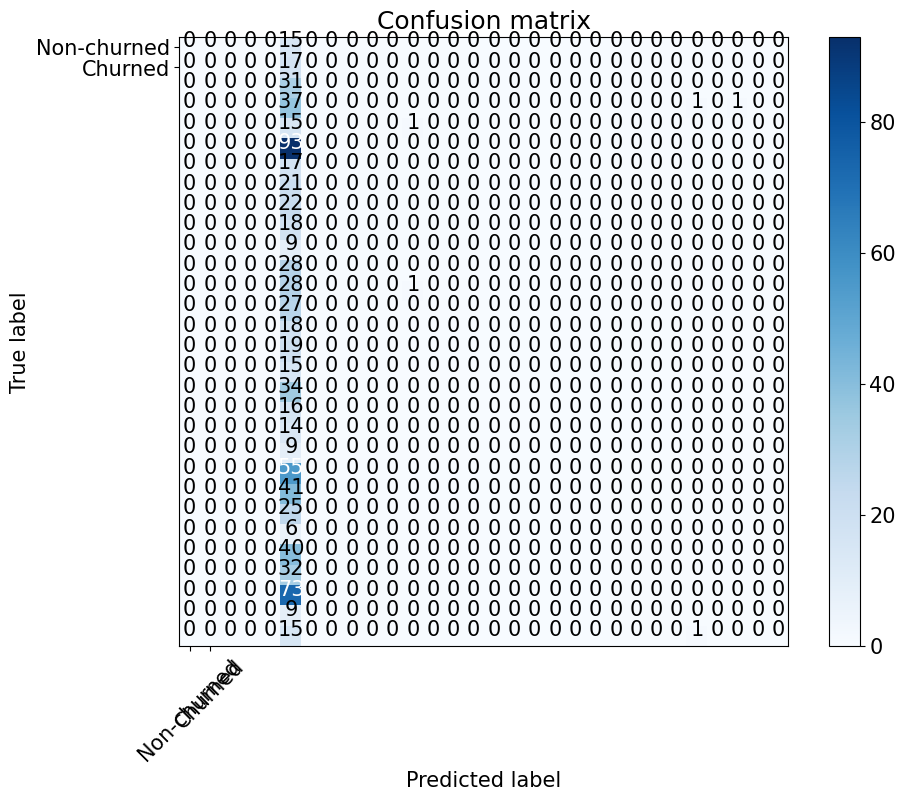

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

font = {'size' : 15}

plt.rc('font', **font)

cnf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix, classes=['Non-churned', 'Churned'],
                      title='Confusion matrix')
plt.savefig("conf_matrix.png")
plt.show()

In [ ]:
type([2, 3, 5])

list